# 数据探索性分析与数据预处理

刘逸凡 3220190847

数据集youtube-new

In [8]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
import json
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols
import json
# 读取数据
df = pd.read_csv('C:/Users/74024/Documents/study/Going/DM/DM427/youtube-new/USvideos.csv', low_memory=False)
with open('C:/Users/74024/Documents/study/Going/DM/DM427/youtube-new/US_category_id.json', 'r') as f:
    j= json.load(f)
# 数值属性
label_num = ['views','likes','dislikes','comment_count']
lable_nom = ['category_id','trending_date','title', 'channel_title', 'tags',
             'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
             'publish_time','description']
df_num = df[label_num]
df_nom = df[lable_nom]


每行数据包括个列，分别代表：

- `video_id` 视频id，唯一属性
- `trending_date` 流行时间
- `title` 视频标题
- `channel_title` 发布频道
- `category_id` 类别id（每个国家对应的类别不同）
- `publish_time` 发布时间
- `tags` 视频标签
- `views` 观看数量
- `likes` 喜欢数量
- `dislikes` 不喜欢数量
- `comment_count` 评论数量
- `thumbnail_link` 视频链接，唯一属性
- `comments_disabled` 是否禁止评论
- `ratings_disabled` 是否禁止打分
- `video_error_or_removed` 是否错误或删除
- `description` 视频描述

接下来的内容将区分国家，对以上属性中的数值属性以及有意义的非唯一标称属性进行数据分析与预处理。

## 数值属性：

选取数值属性，分别使用.max(),.min(),.mean(),.median(),.quantile()等函数获取属性最大、最小、均值、中位数、四分位数。使用.isnull().sum()函数获取缺失值个数。

### 五数概括

In [18]:
#数值属性5数概括
def Num5():
    for item in label_num:
        Minimum = df[item].min()
        Maximum = df[item].max()
        Q1 = df[item].quantile(0.25)
        Median = df[item].mean()
        Q3 = df[item].quantile(0.75)
        print("{}五数概括为：{}，{}，{}，{}，{}".format(item,Minimum,Q1,Median,Q3,Maximum))
Num5()

views五数概括为：549，242329.0，2360784.6382573447，1823157.0，225211923
likes五数概括为：0，5424.0，74266.7024347359，55417.0，5613827
dislikes五数概括为：0，202.0，3711.400888910596，1938.0，1674420
comment_count五数概括为：0，614.0，8446.803682629612，5755.0，1361580


### 缺失值个数

In [19]:
#数值属性缺失值个数
def lostdata(nums):
    for item in nums:
         nulltotal = nums[item].isnull().sum()
         print("{}数据缺失值个数为：{}".format(item, nulltotal))
lostdata(df_num)

views数据缺失值个数为：0
likes数据缺失值个数为：0
dislikes数据缺失值个数为：0
comment_count数据缺失值个数为：0


由缺失值得出数据来看，数值属性并无缺失值

### 直方图

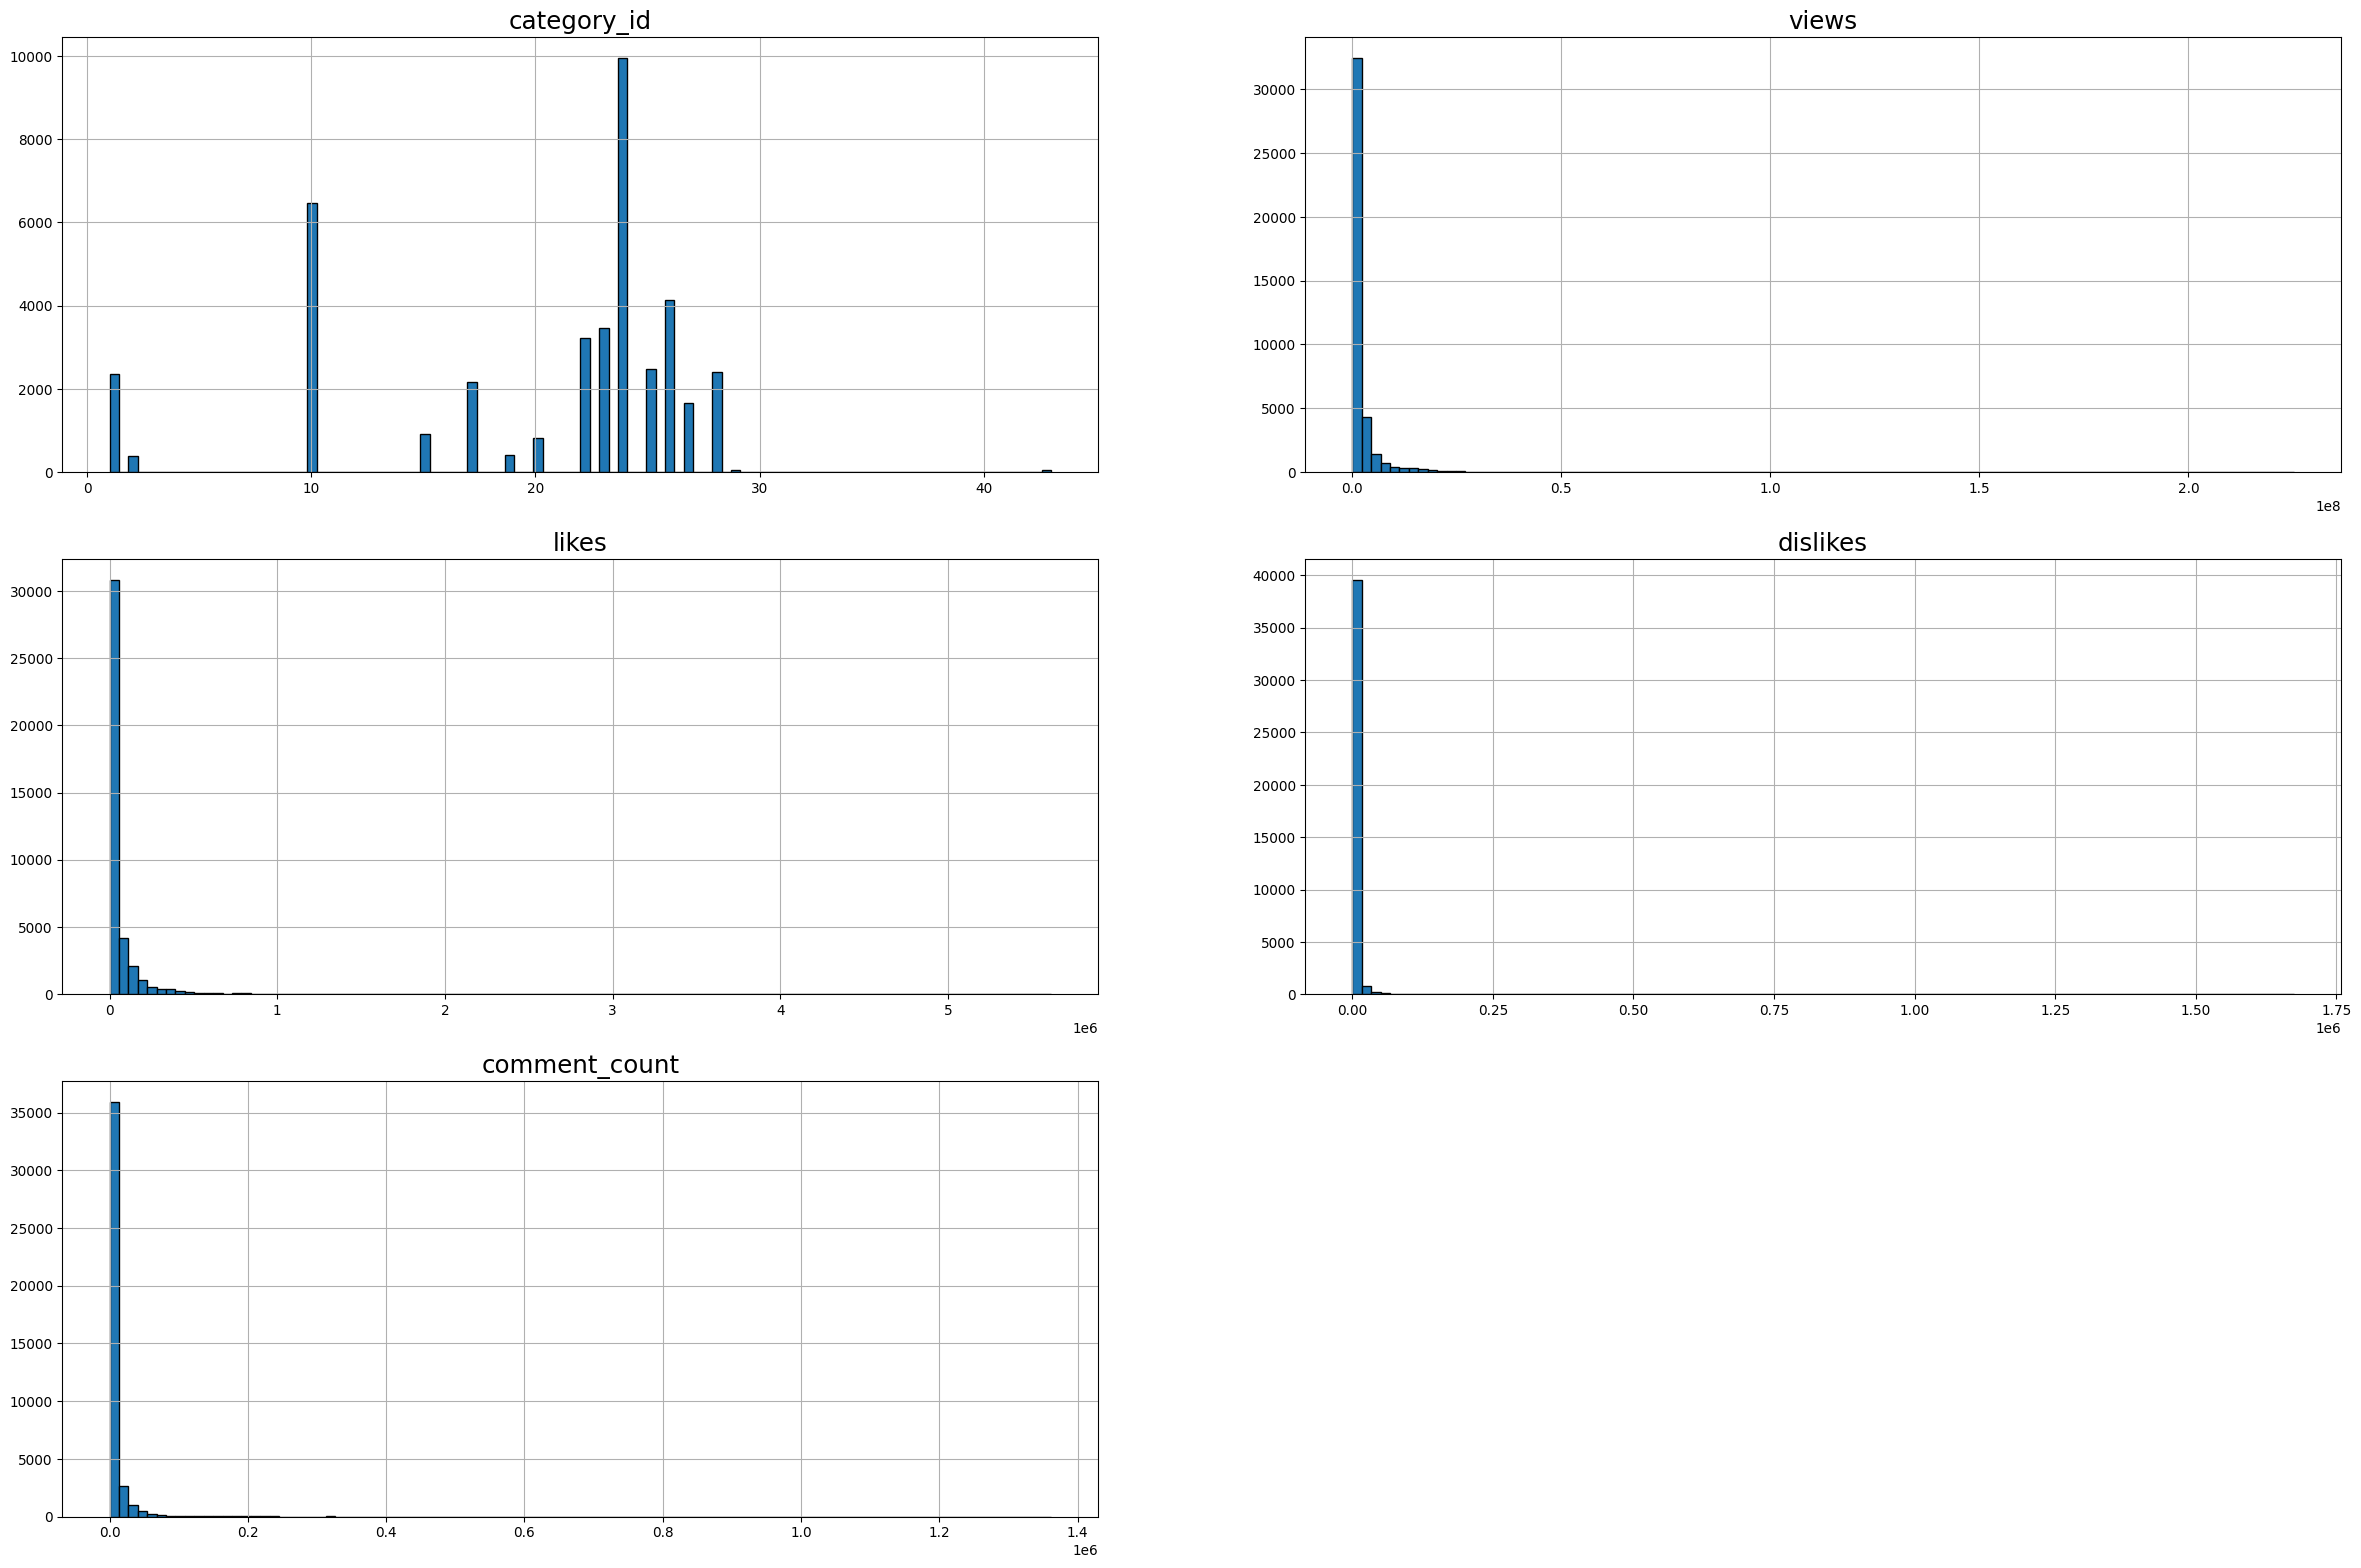

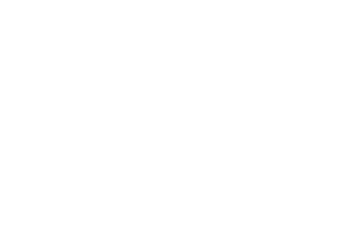

In [22]:
def numhist():
    plt.figure(figsize=(30, 20), dpi=98)
    i=1
    for item in label_num:
        p=plt.subplot(3,2,i)
        plt.sca(p)
        df[item].hist(bins=100,edgecolor = 'black')
        p.set_title(item,fontsize=18)
        i=i+1
    plt.show()
    plt.axis('off')
numhist()

4194399.0
130406.5
4542.0
13466.5


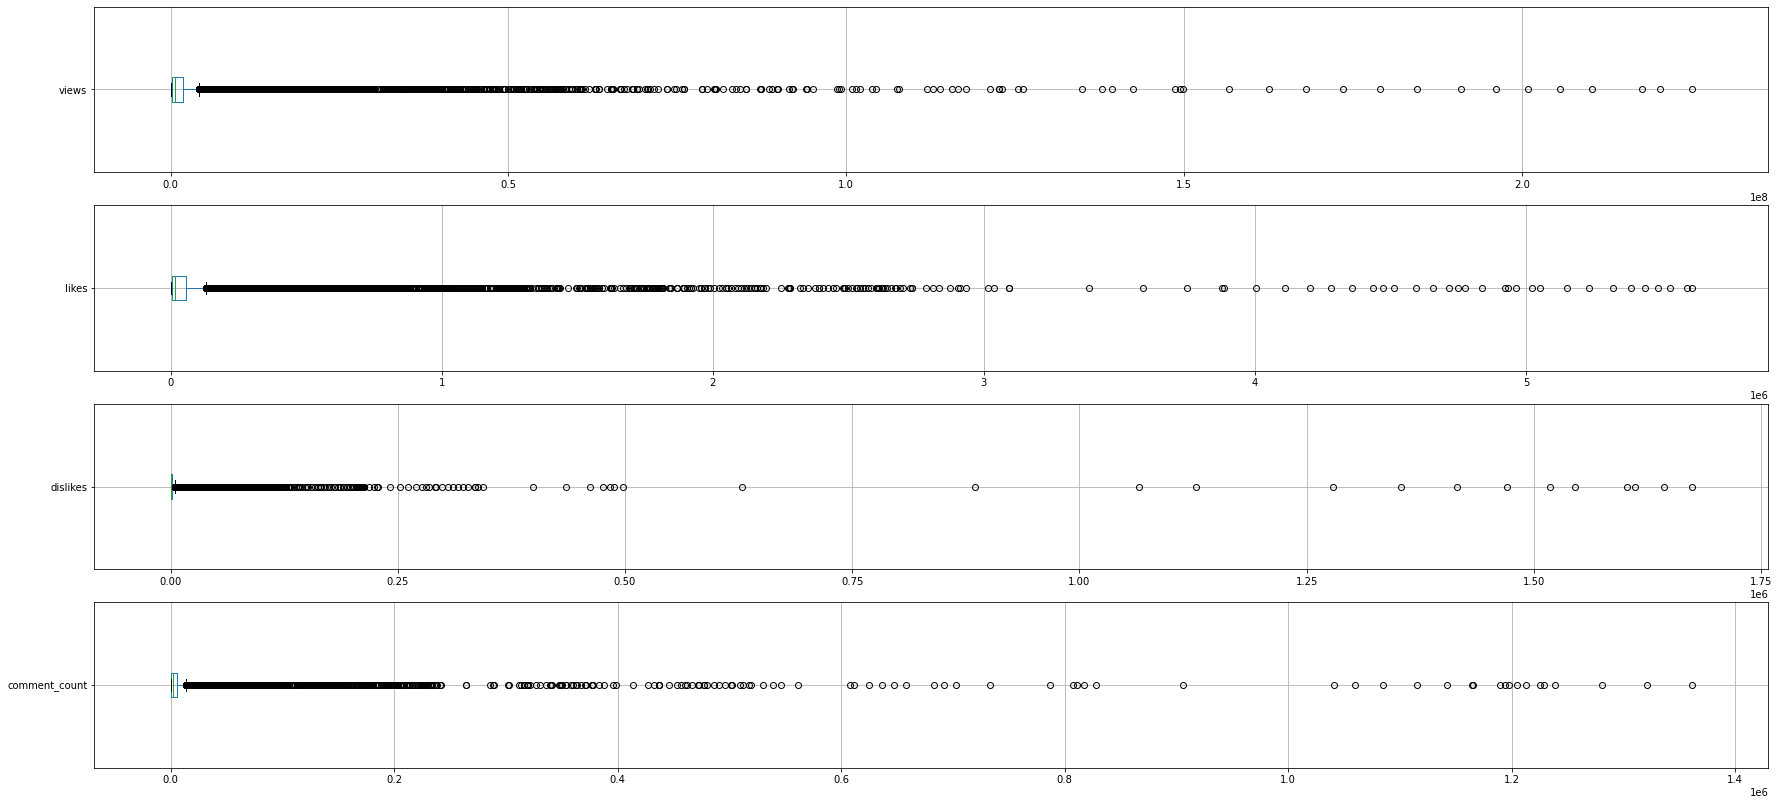

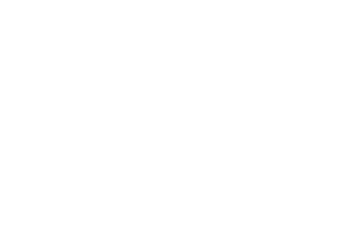

In [26]:
def numBox():
    plt.figure(figsize=(30, 14))
    i=1
    for item in label_num:
        p=plt.subplot(4,1,i)
        plt.sca(p)
        pd.DataFrame(df[item]).boxplot(vert=False)
        i=i+1
        outlier = np.percentile(df[item],75) + (np.percentile(df[item],75) - np.percentile(df[item],25)) * 1.5
        print(outlier)
    plt.show()
    plt.axis('off')
numBox()

views属性由盒图和直方图可以看出，同为流行视频，其播放量差异还是非常明显：观看量在100w以下的视频占了绝大多数，超过4194399是离群点。

likes属性由盒图和直方图可以看出，其喜欢差异还是非常明显：喜欢在3w以下的视频占了绝大多数，超过130407是离群点。

dislikes属性由盒图和直方图可以看出，其不喜欢差异还是非常明显：不喜欢在2500以下的视频占了绝大多数，超过4542是离群点。

comment_count属性由盒图和直方图可以看出，其评论差异还是非常明显：评论在2500以下的视频占了绝大多数，超过13467是离群点。

## 标称属性：

### 流行时间trending_date

频数

In [8]:
freq = df['trending_date'].value_counts()
freq

18.11.03    200
17.26.12    200
18.09.01    200
18.24.02    200
18.05.06    200
           ... 
18.01.02    197
18.31.01    197
18.03.02    196
18.02.02    196
18.04.02    196
Name: trending_date, Length: 205, dtype: int64

由以上结果可知，大多数流行时间的trending viedo的个数都为200个，其余少数日期的个数为171、190、191、195、196、197、198、199，无缺失值。

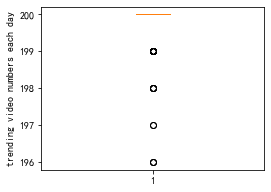

In [15]:
#盒图
def Box(nums):
    plt.figure(figsize=(4, 3))
    plt.boxplot(nums,notch=False)
    plt.ylabel('trending video numbers each day')
    plt.show()
Box(np.array(freq))

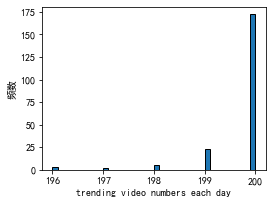

In [14]:
#直方图
def plothist(nums):
    plt.figure(figsize=(4, 3))
    plt.hist(x=nums,  # 指定绘图数据
             bins=40,# 指定直方图中条块的个数
             edgecolor = 'black') # 指定直方图的边框色
    plt.xlabel('trending video numbers each day')
    plt.ylabel('频数')
    plt.show()
plothist(np.array(freq))

由盒图可以看出，一天内大部分流行视频的数目都为200，导致盒图的盒子里只有200一条线。直方图上也可以看出，频数分布在200作用，距离较为离群的点为2018年5月14日的流行视频数量，为171。根据推测是该数据集的收录有问题，应该youtube热榜每天都是200个，数量不足200的可能是流行视频被删除等因素导致的。

### 类别category_id

频数

获取类别id对应类别名称

In [34]:
category = {}
for i in j['items']:
    category[i['id']] = i['snippet']['title']
# 查找类别名，若存在缺失，先用nan表示
cate = []
for i in df['category_id'].values:
    if(str(i) in category.keys()):
        cate.append(category[str(i)])
    else:
        cate.append('nan')
freq = pd.Series(cate).value_counts()
freq

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
dtype: int64

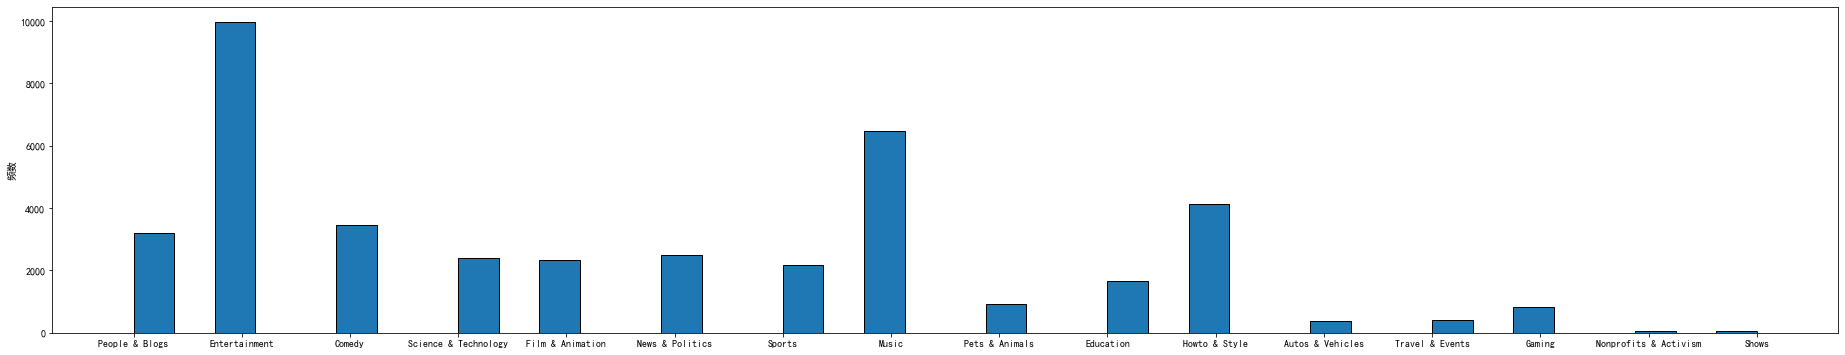

In [29]:
def plothistcate(nums):
    plt.figure(figsize=(32, 6))
    plt.hist(x=nums,  # 指定绘图数据
             bins=40,# 指定直方图中条块的个数
             edgecolor = 'black') # 指定直方图的边框色
    plt.ylabel('频数')
    plt.show()
plothistcate(np.array(cate))

由分析数据可见，youtube上的视频娱乐和音乐类的是所有流量视频中最多的，其他种类视频频数如上述直方图所示。

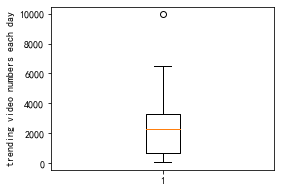

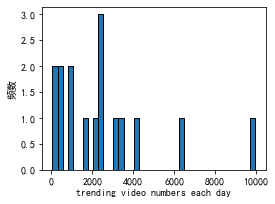

In [35]:
Box(freq)
plothist(freq)

由盒图可知，频数9964的娱乐视频为数据集的离群点，由直方图知，大部分视频种类的视频数量集中在0到4000以内

### 标签tags

tags属性存在唯一性，原数据集tag缺失的原因应是原视频并无tag，可以通过属性之间的相关关系进行填充。将title填充到为空的tags属性中。

In [9]:
n=[i for i in df['tags'] if i=='[none]']
print("缺失值为：{}".format(len(n)))

缺失值为：1535


In [10]:
def corfill(nums):
    for i in range(len(nums['tags'])):
        if (nums['tags'][i]=='[none]'):
            nums.loc[i, 'tags']  = nums.loc[i, 'title']
corfill(df)
n = [i for i in df['tags'] if i == '[none]']
print("缺失值为：{}".format(len(n)))

缺失值为：0


### 描述description

description属性存在唯一性，原数据集描述缺失的原因应是原视频并无描述，可以通过属性之间的相关关系进行填充。将标题填充到为空的描述属性中。

In [12]:
n=[i for i in df['description'] if(pd.isna(i))]
print("缺失值为：{}".format(len(n)))

缺失值为：570


In [13]:
def corfill(nums):
    for i in range(len(nums['description'])):
        if (pd.isna(nums['description'][i])):
            nums.loc[i, 'description']  = nums.loc[i, 'title']
corfill(df)
n = [i for i in df['description'] if (pd.isna(i))]
print("缺失值为：{}".format(len(n)))

缺失值为：0


### 禁止评论comments_disabled

In [15]:
def frequency(label):
    f = df[label].value_counts()
    f = pd.DataFrame(f)
    return f
f=frequency('comments_disabled')
f

,comments_disabled
False,40316
True,633


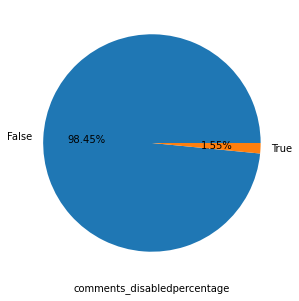

In [21]:
def perpie(label):
    plt.figure(figsize = (5, 5))
    plt.pie(np.array(df[label].value_counts()), autopct='%.2f%%', labels = ['False', 'True'])
    plt.xlabel(label+'percentage')
    plt.show()
perpie('comments_disabled')

98%的视频都支持评论，所有视频中只有633个视频禁止评论。

### 禁止打分ratings_disabled

In [18]:
f=frequency('ratings_disabled')
f

,ratings_disabled
False,40780
True,169


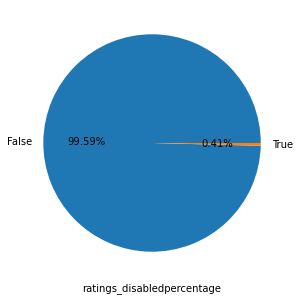

In [23]:
perpie('ratings_disabled')

99%的视频都支持打分，所有视频中只有169个视频禁止打分。

### 视频错误或删除video_error_or_removed

In [24]:
f=frequency('video_error_or_removed')
f

,video_error_or_removed
False,40926
True,23


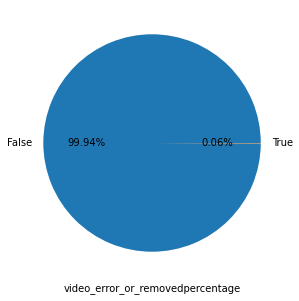

In [25]:
perpie('video_error_or_removed')